## Anomaly Detection Demonstration

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("/content/anomaly_train.csv")

In [3]:
data

,TransactionID,Amount,Type,Time,Location,User
0,1,45.601418,Retail Purchase,8.229237,Suburbs,24
1,2,44.538540,Retail Purchase,15.689091,Online,17
2,3,36.424406,Online Purchase,12.065032,Online,100
3,4,48.439531,Retail Purchase,16.244420,Suburbs,90
4,5,41.271577,Retail Purchase,8.695462,Online,17
...,...,...,...,...,...,...
995,996,26.751656,Online Purchase,6.958674,Online,19
996,997,22.727491,Retail Purchase,8.522672,Suburbs,60
997,998,61.213662,Online Purchase,11.298679,Online,53
998,999,81.509805,Retail Purchase,13.576137,Online,25


In [4]:
data.describe()

,TransactionID,Amount,Time,User
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,55.661137,11.885887,51.355000
std,288.819436,49.335773,4.056238,28.782658
min,1.000000,0.998962,0.756713,1.000000
25%,250.750000,37.822697,9.235254,27.000000
50%,500.500000,51.438212,11.847548,50.000000
75%,750.250000,64.881544,14.646819,77.000000
max,1000.000000,644.035776,24.753958,100.000000


In [5]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [6]:
# Encode labels in column 'type'.
data['Type']= label_encoder.fit_transform(data['Type'])
data['Location']= label_encoder.fit_transform(data['Location'])

In [7]:
# Select the features to be used for anomaly detection
features = ["Amount", "Type", "Time","Location"]

In [8]:
# Create a new dataframe with the selected features
X = data[features]

In [9]:
# Fit an Isolation Forest model to the data
model = IsolationForest(n_estimators=100, contamination=0.1)
model.fit(X)

# Predict the anomalies in the data
y_pred = model.predict(X)

In [10]:
# Add the predicted anomaly scores to the original dataframe
data["anomaly_score"] = model.decision_function(X)


In [11]:
data

,TransactionID,Amount,Type,Time,Location,User,anomaly_score
0,1,45.601418,1,8.229237,2,24,0.099623
1,2,44.538540,1,15.689091,1,17,0.090958
2,3,36.424406,0,12.065032,1,100,0.112448
3,4,48.439531,1,16.244420,2,90,0.075897
4,5,41.271577,1,8.695462,1,17,0.089536
...,...,...,...,...,...,...,...
995,996,26.751656,0,6.958674,1,19,0.059534
996,997,22.727491,1,8.522672,2,60,0.059238
997,998,61.213662,0,11.298679,1,53,0.119119
998,999,81.509805,1,13.576137,1,25,0.082937


In [12]:
anomalies = data.loc[data["anomaly_score"] < 0]

In [13]:
anomalies

,TransactionID,Amount,Type,Time,Location,User,anomaly_score
6,7,83.346870,0,6.516061,0,7,-0.003786
29,30,31.476703,0,18.322619,0,13,-0.001250
31,32,0.998962,0,18.888312,2,82,-0.050349
35,36,13.571929,0,18.831865,0,75,-0.053393
55,56,48.543605,1,1.424739,2,71,-0.018244
...,...,...,...,...,...,...,...
946,947,30.736284,0,3.082786,2,23,-0.018284
949,950,501.580442,0,18.041606,0,20,-0.146166
954,955,41.147936,0,3.036573,0,72,-0.013103
972,973,391.040195,0,14.270422,1,50,-0.097462


In [14]:
# predict
df_test= pd.read_csv("/content/anomaly_test.csv")

In [15]:
df_test

,TransactionID,Amount,Type,Time,Location,User
0,991,30.513825,1,9.203208,0,63
1,992,61.614006,0,14.670887,0,26
2,1,45.601418,1,8.229237,2,24
3,994,55.021247,1,13.790995,2,58
4,995,92.153480,0,13.894112,1,19
5,32,0.998962,0,18.888312,2,82
6,997,22.727491,1,8.522672,2,60
7,998,61.213662,0,11.298679,1,53
8,56,48.543605,1,1.424739,2,71
9,1000,65.208202,1,14.752207,1,94


In [17]:
x=df_test[features]
df_values=x.values

find=df_values
result=[]
for i in find:
  z=model.predict([i])
  if z==[1]:
    result.append('no')
  elif z==[-1]:
    result.append('yes')

df_test['Anomaly']=result

In [18]:
df_test.head(10)

,TransactionID,Amount,Type,Time,Location,User,Anomaly
0,991,30.513825,1,9.203208,0,63,no
1,992,61.614006,0,14.670887,0,26,no
2,1,45.601418,1,8.229237,2,24,no
3,994,55.021247,1,13.790995,2,58,no
4,995,92.153480,0,13.894112,1,19,no
5,32,0.998962,0,18.888312,2,82,yes
6,997,22.727491,1,8.522672,2,60,no
7,998,61.213662,0,11.298679,1,53,no
8,56,48.543605,1,1.424739,2,71,yes
9,1000,65.208202,1,14.752207,1,94,no


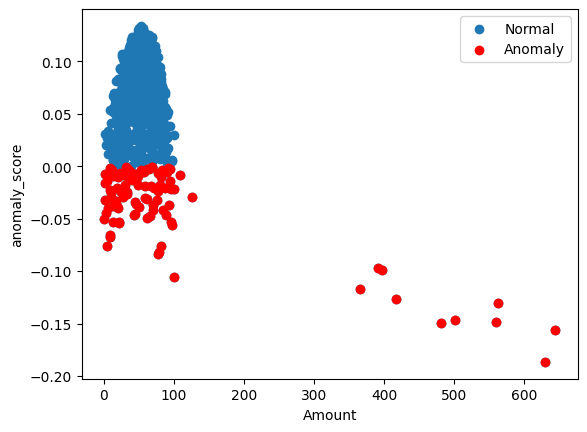

In [20]:

# Create a scatter plot of suspicious activity vs social connections
plt.scatter(data["Amount"], data["anomaly_score"], label="Normal")
plt.scatter(anomalies["Amount"], anomalies["anomaly_score"], color="r", label="Anomaly")
plt.xlabel("Amount")
plt.ylabel("anomaly_score")
plt.legend()
plt.show()